In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from models import DiT_models 
from data import prepare_mnist_data  

/localdisk4/Abdul/miniconda3/envs/vit/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_save_path = "./models/model_DiT-B_4_epochs_10_lr_0.0003_bs_128/model.pth"


In [17]:
model = DiT_models['DiT-B/4'](input_size=32, in_channels=1, num_classes=10, learn_sigma=False).to(device)
model.load_state_dict(torch.load(model_save_path))
model.eval()
print('Model loaded and set to evaluation mode')

Model loaded and set to evaluation mode


/tmp/ipykernel_3298005/1713828656.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_save_path))


In [29]:
b, c, h, w = 1, 1, 32, 32 
random_noise = torch.randn(b, c, h, w, device=device)

In [30]:
with torch.no_grad():
    output = random_noise
    for i in range(100):
        t = torch.tensor([i/100]).to(device)
        t = 1-t
        output = output +  model(output, t, torch.tensor([6]).to(device)) * 1/100


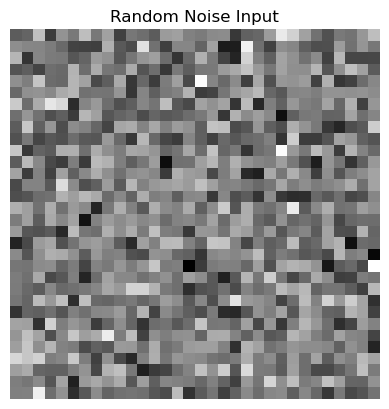

In [31]:
plt.imshow(random_noise.cpu().squeeze(), cmap='gray')
plt.title('Random Noise Input')
plt.axis('off')
plt.show()

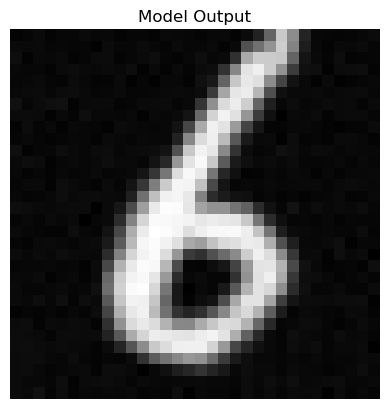

In [32]:
output_image = output.cpu().squeeze().detach().numpy()
plt.imshow(output_image , cmap='gray')  # Use a different colormap to visualize the output
plt.title('Model Output')
plt.axis('off')
plt.show()